# TRANSFER - LEARNING = IT IS A RESEARCH PROBLEM IN MACHINE LEARNING THAT DEALS WITH STORING KNOWLEDGE GAINED  WHILE SOLVING ONE PROBLEM AND APPLYING IT TO A DIFFERENT BUT RELATED PROBLEM . Eg - KNOWLEDGE  GAINED WHILE LEARNING TO RECOGNIZE CARS SAME CAN BE USED FOR RECOGNIZING TRUCKS.

# MOBILE_NET_v2 - PRETRAINED MODEL FROM GOOGLE 

In [59]:
import numpy as np
import pandas as pd
import cv2 
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import tf_keras
IMAGE_SHAPE = (224, 224)
classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

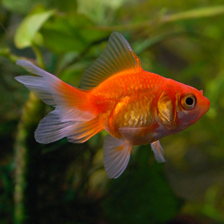

In [60]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [61]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [62]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result # HERE WE ARE ADDING ONE MORE DIMENSION IN ORDER TO MAKE PREDICTION EASY 
# THE RESULT SHOWS THE PROBABILITY OF EACH CLASS. HERE CLASS 2 HAS MOST PROBABILITY SO ITS VALUE IS 9.6 AND IT IS "GOLD FISH" 

1/1 [==============================] - 1s 872ms/step


array([[ 0.22101465,  2.047492  ,  9.622563  , ..., -1.4621571 ,
        -0.28146562, -0.2598475 ]], dtype=float32)

In [63]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [64]:
image_labels = []
with open("ImageNetLabels.txt" , "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [65]:
image_labels[predicted_label_index]

'goldfish'

In [66]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it
data_dir

'.\\datasets\\flower_photos'

In [67]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir 

WindowsPath('datasets/flower_photos')

In [68]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [69]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [70]:
roses = (list(data_dir.glob('*/*.jpg')))
roses[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

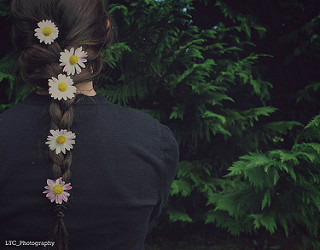

In [71]:
Image.open(str(roses[4]))

In [72]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
}


In [73]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers':3,
    'tulips':4,
}

In [74]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [75]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [76]:
X,y = [] , []
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [77]:
X = np.array(X)
y = np.array(y)

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [79]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [80]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis = 1)
predicted

1/1 [==============================] - 2s 2s/step


array([795, 880, 795], dtype=int64)

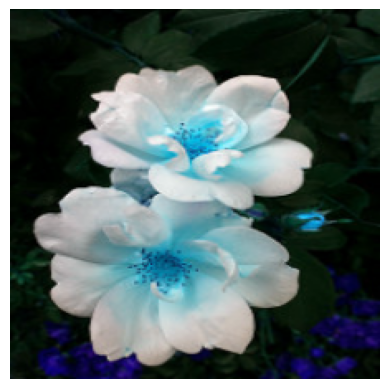

In [81]:
plt.axis('off')
plt.imshow(X[0])

# NOW WE USE PRE- TRAINED MODEL THAT HAS FIXED ITS WEIGHT AND LAYERS EXCEPT THE LAST LAYER FORM ABOVE MODEL . AND WE WONT TRAIN IT AGAIN

In [82]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [83]:
num_of_flowers = 5

model = tf_keras.Sequential([
  pretrained_model_without_top_layer, # THESE LAYERS ARE PRE- TRAINED 
  tf_keras.layers.Dense(num_of_flowers) # ONLY THIS LAST LAYER IS USED TO PREDICT CORRECT CLASS
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [84]:
model.compile(
  optimizer="adam",
  loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 50s 493ms/step - loss: 0.8077 - acc: 0.7028
Epoch 2/5
86/86 [==============================] - 40s 462ms/step - loss: 0.4045 - acc: 0.8681
Epoch 3/5
86/86 [==============================] - 42s 492ms/step - loss: 0.3077 - acc: 0.9048
Epoch 4/5
86/86 [==============================] - 41s 479ms/step - loss: 0.2587 - acc: 0.9222
Epoch 5/5
86/86 [==============================] - 43s 497ms/step - loss: 0.2191 - acc: 0.9364


In [85]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 19s 580ms/step - loss: 0.4014 - acc: 0.8617


[0.4014095962047577, 0.8616557717323303]